<a href="https://colab.research.google.com/github/bhnunes/FE067A/blob/main/Exerc%C3%ADcio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reproduza e explique, usando Matlab ou Python, as curvas das funções de
ativação mostradas no vídeo seguinte:
https://www.youtube.com/watch?v=cVVO3yl1tx8

Função Sigmóide: $\sigma(x) = \frac{1}{1 + e^{-x}}$

Função Tangente Hiperbólica : $\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $

Função RELU: $\text{ReLU}(z) = \max(0, z) $

Equação Geral the Uma rede neural:

$y_k = \phi\left(\sum_{i=1}^{n} w_{ki} x_i + b_k\right) $

Onde:

$( y_k )$ é a saída do $( k )$-th neurônio.

$( \phi )$ denota a função de ativação, que introduz não linearidade no modelo. Escolhas comuns para essa função $( \phi )$ incluem a função sigmóide, Tangente hiperbólica $(tanh)$, e função linear retificada $(ReLU)$.

$( \sum_{i=1}^{n} w_{ki} x_i )$ representa a soma ponderada dos inputs $( x_i )$ ao neurônio, onde $( w_{ki} )$ são os pesos associados com cada input.

$( b_k )$ é o termo de Bias para o $( k )$-th neurônio.

In [367]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from time import sleep

In [368]:
# Define a escala de valores
x = np.linspace(-10, 10, 400)
global n
#1 = Sigmoidal, 2 = Tangente Hiperbólica, 3 = RELU
n=1

In [369]:
# Calcula o valor de y(x)
y = 3 * x + 0.5

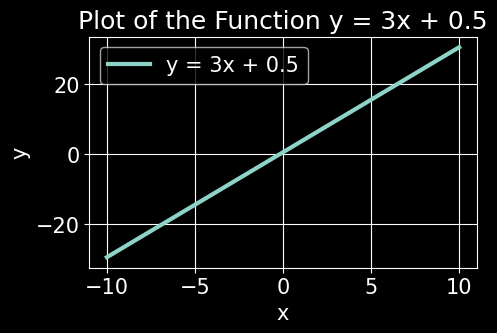

In [370]:
# Plota a função
plt.figure(figsize=(5, 3))  # Set the size of the plot
plt.plot(x, y, label='y = 3x + 0.5')  # Plot the function
plt.xlabel('x')  # Label the x-axis
plt.ylabel('y')  # Label the y-axis
plt.title('Plot of the Function y = 3x + 0.5')  # Set the title of the plot
plt.grid(True)  # Add grid lines
plt.legend()  # Show legend
plt.show()  # Display the plot

In [371]:
def testFunction(n,y):
  if n==1:
    return 1 / (1 + np.exp(-y))
  elif n==2:
    return np.tanh(y)
  else:
    return np.maximum(0,y)

In [372]:
y = testFunction(n,y)

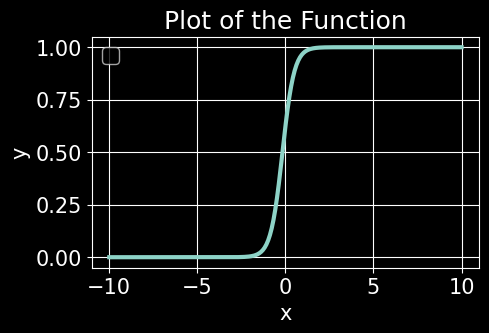

In [373]:
plt.figure(figsize=(5, 3))  # Set the size of the plot
plt.plot(x, y)  # Plot the function
plt.xlabel('x')  # Label the x-axis
plt.ylabel('y')  # Label the y-axis
plt.title('Plot of the Function')  # Set the title of the plot
plt.grid(True)  # Add grid lines
plt.legend()  # Show legend
plt.show()  # Display the plot

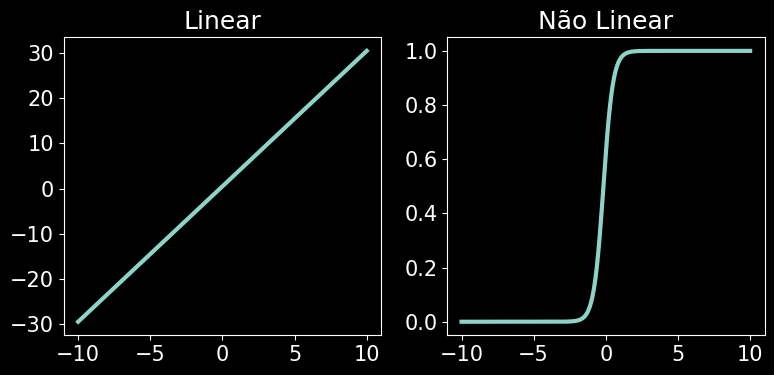

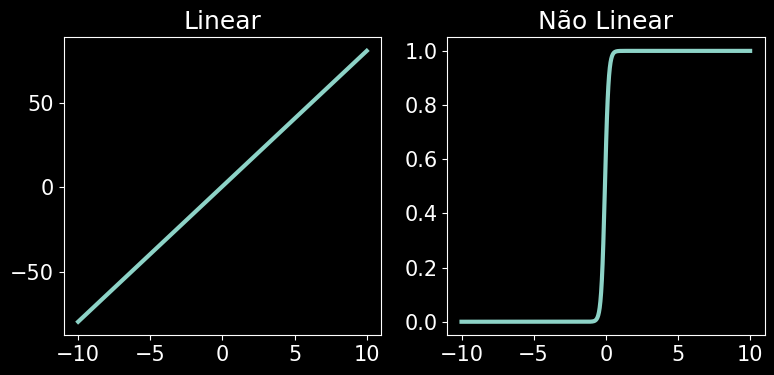

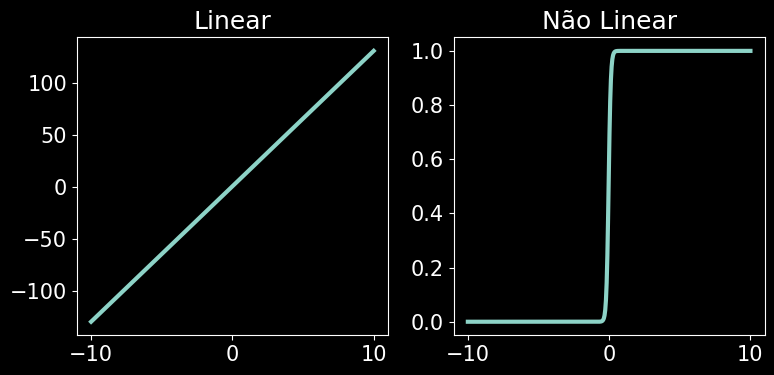

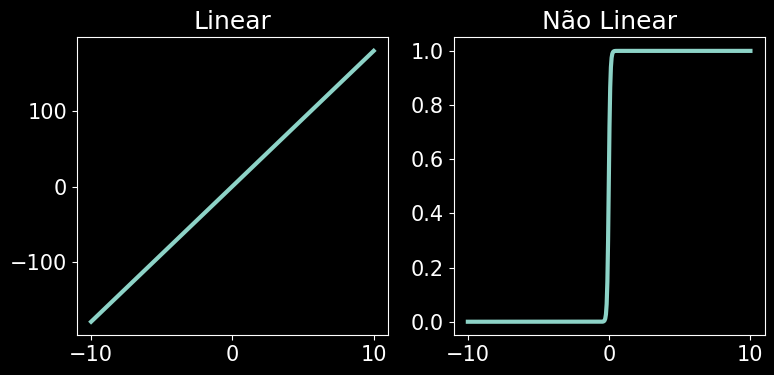

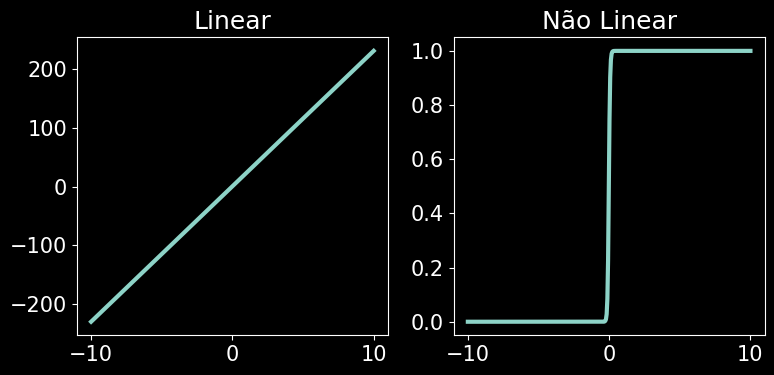

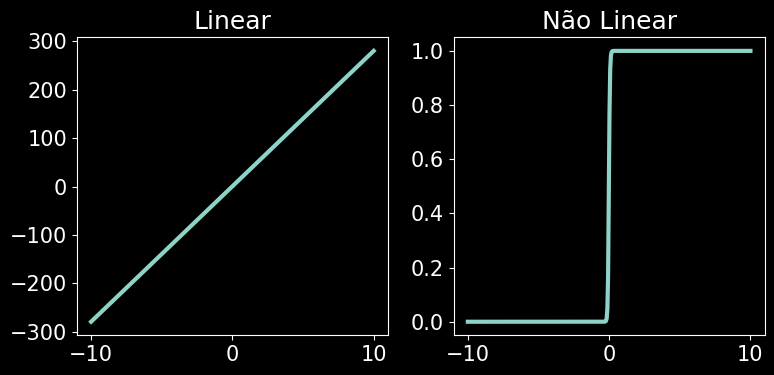

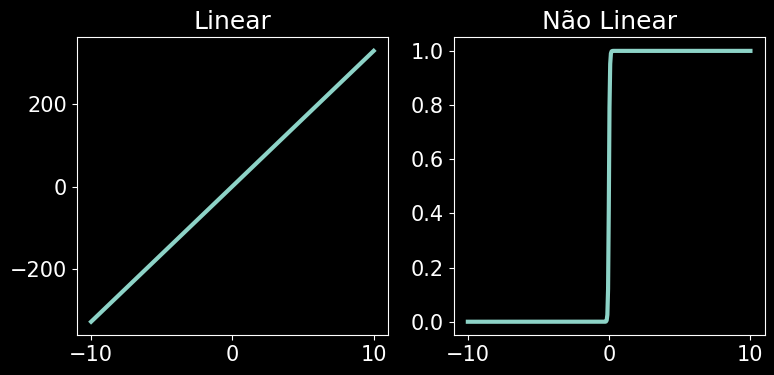

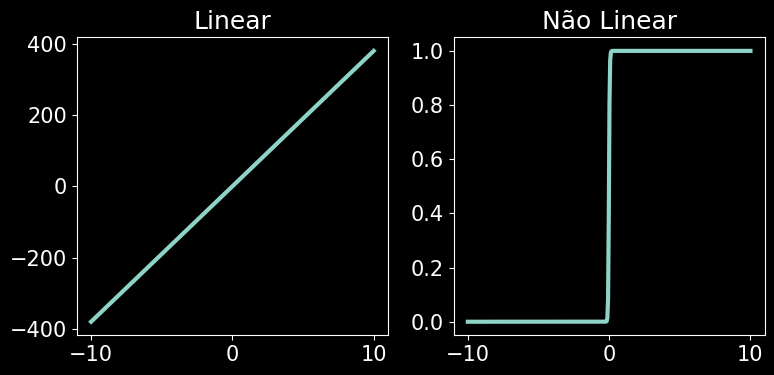

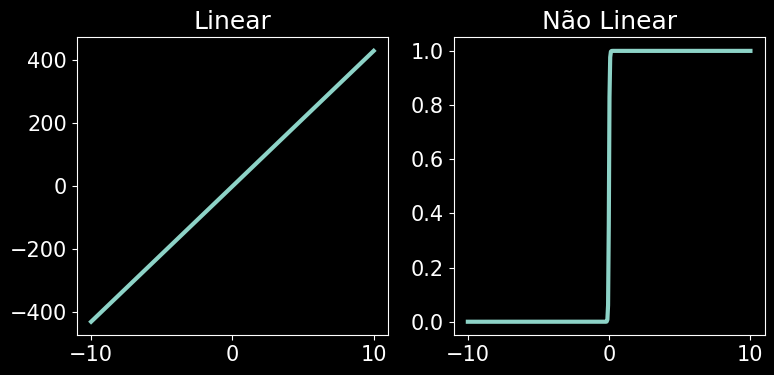

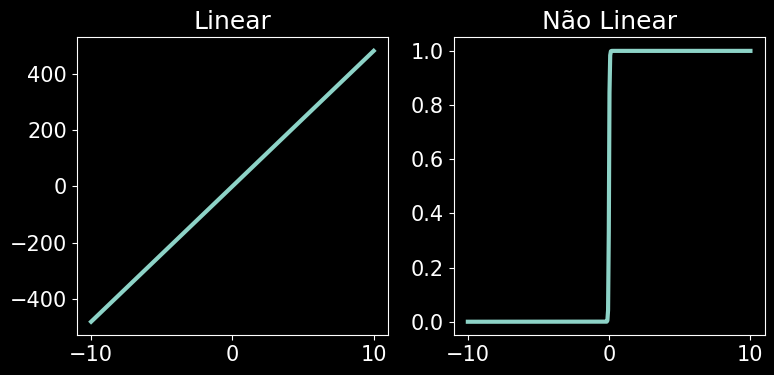

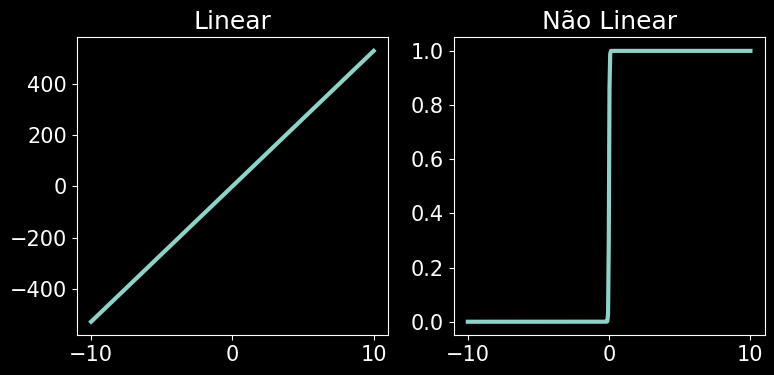

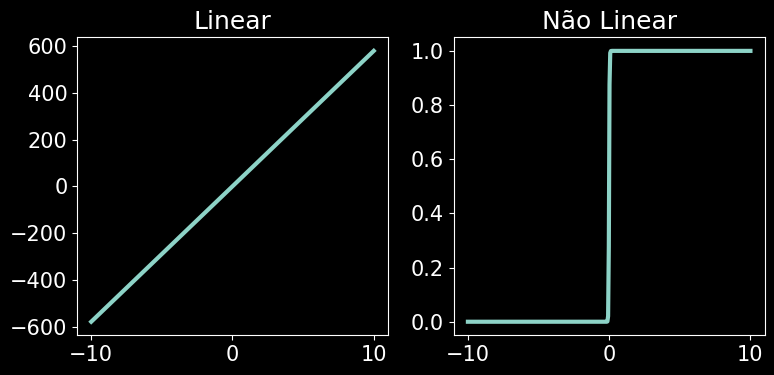

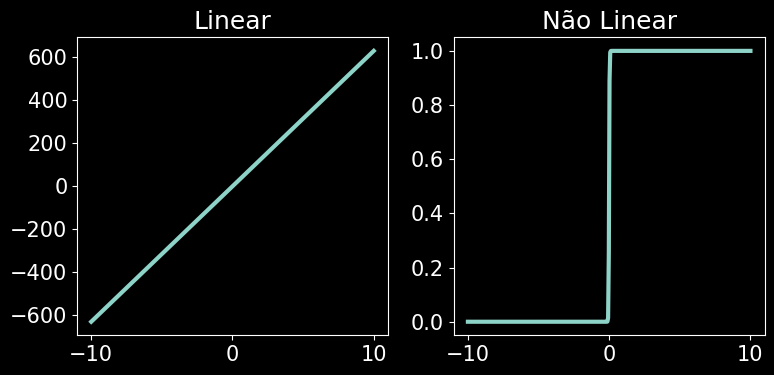

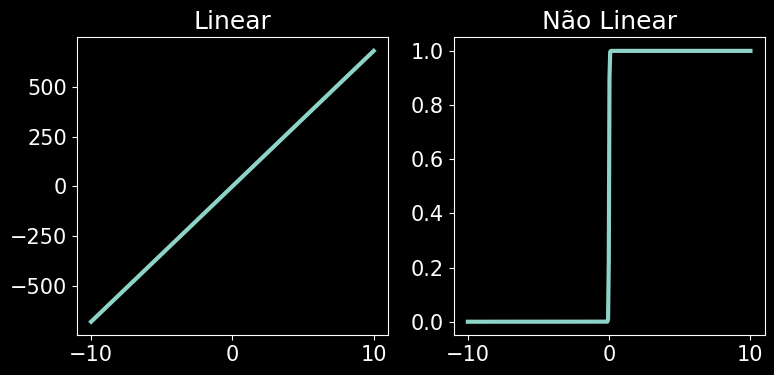

<ipython-input-371-ad803671158d>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-y))


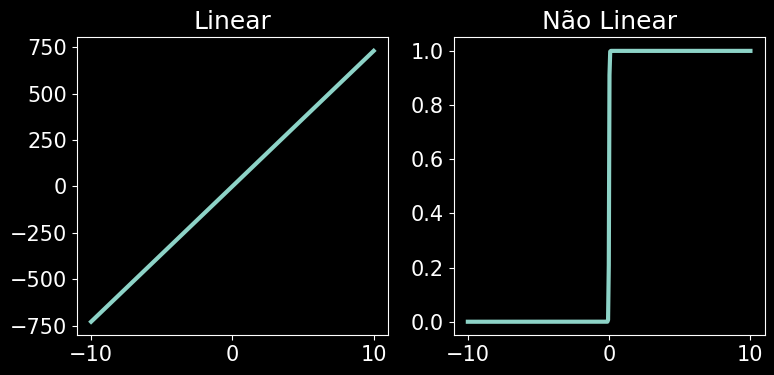

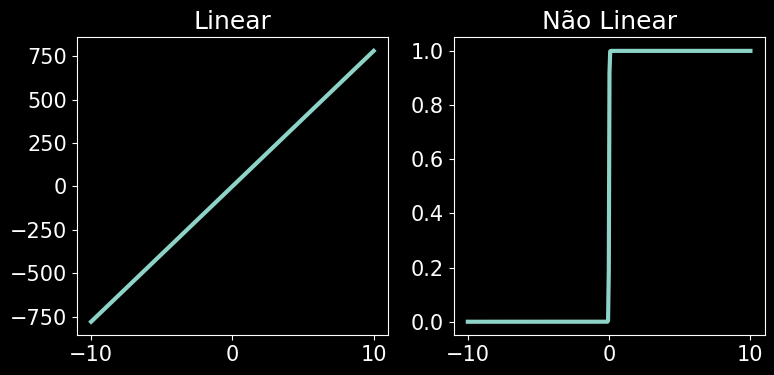

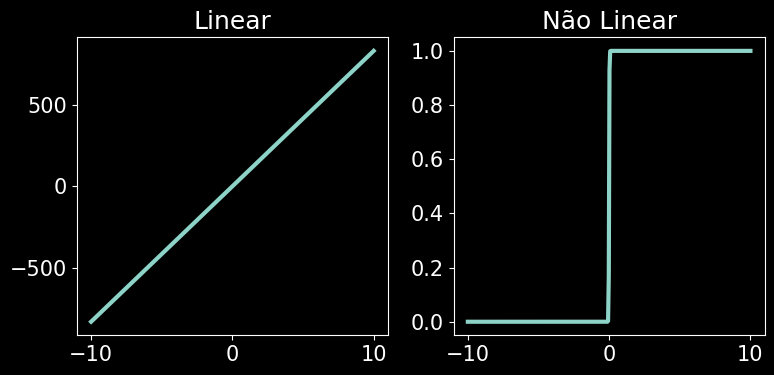

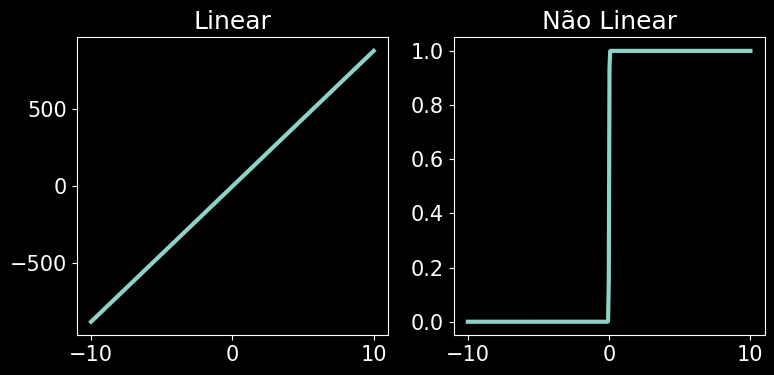

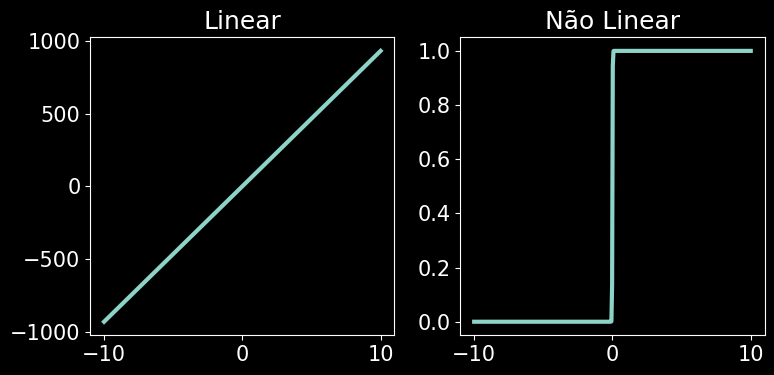

In [374]:
alpha=0.5
beta=3
i=1
while i<20:
  # Clear existing figures
  plt.close('all')
  y1 = beta * x + alpha
  y2 = testFunction(n,y1)

  # Create a figure with 1 row and 2 columns of subplots
  fig, axs = plt.subplots(1, 2, figsize=(8, 4))

  # Plot the first function in the first subplot
  axs[0].plot(x, y1)
  axs[0].set_title('Linear')

  # Plot the second function in the second subplot
  axs[1].plot(x, y2)
  axs[1].set_title('Não Linear')

  # Adjust layout to fit both subplots nicely
  plt.tight_layout()

  # Display the plots
  plt.show()
  i=i+1
  beta=beta+5


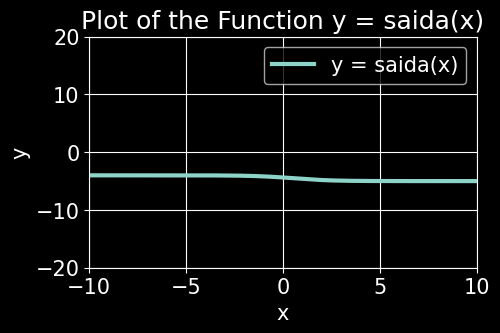

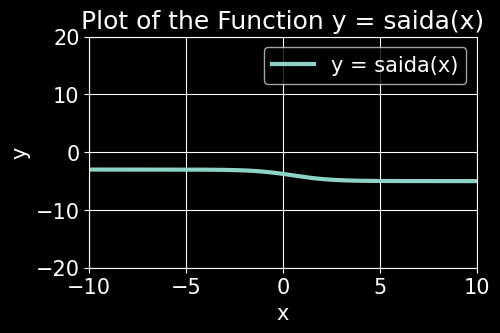

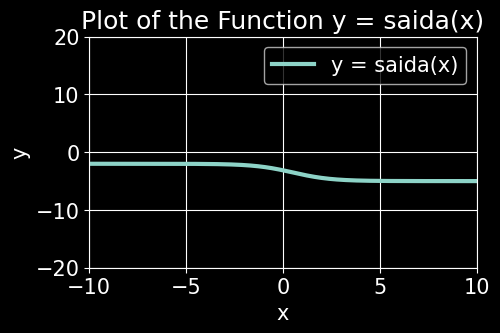

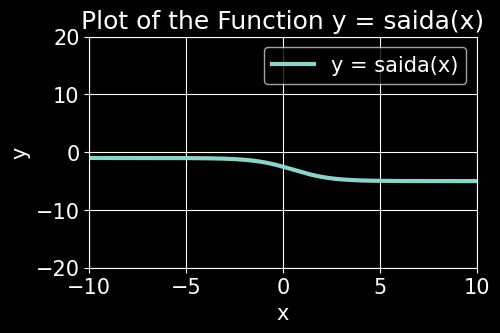

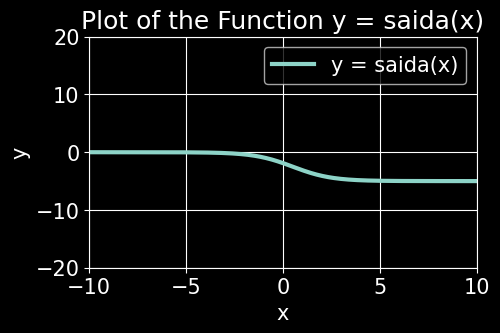

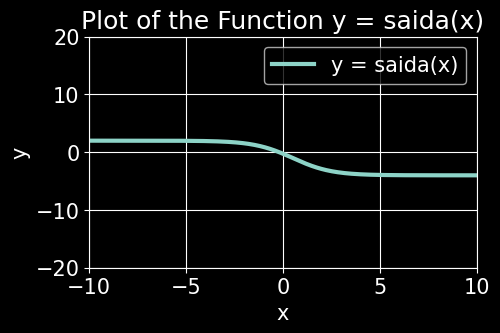

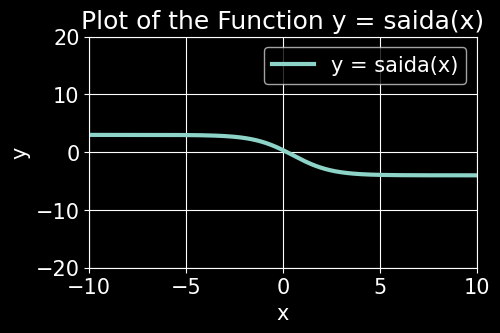

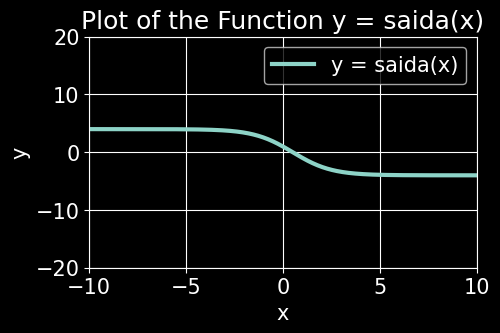

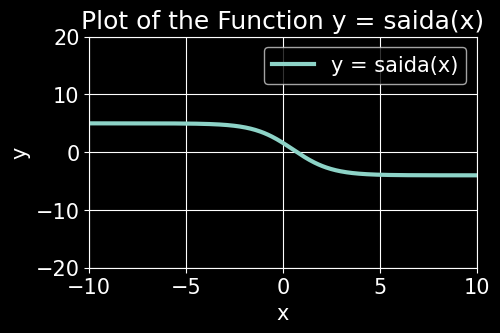

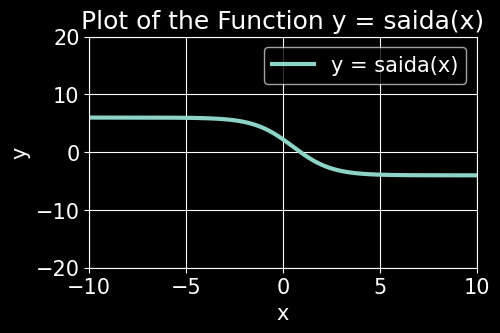

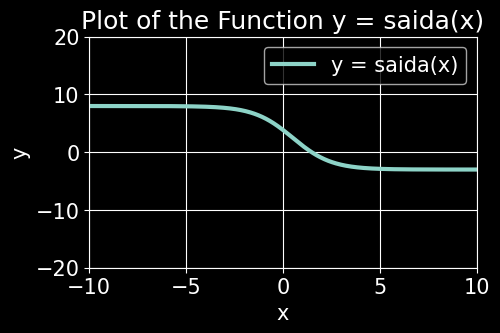

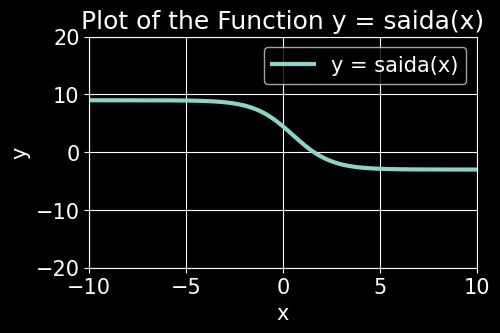

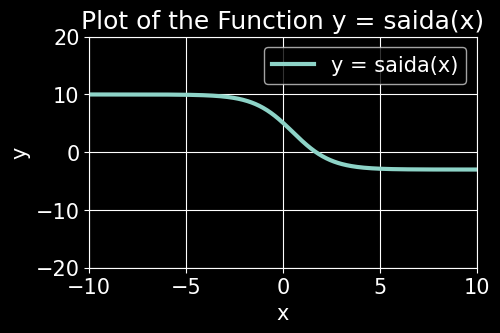

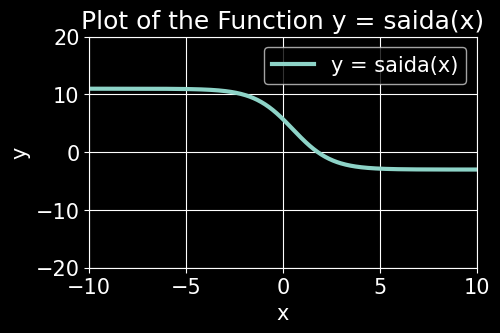

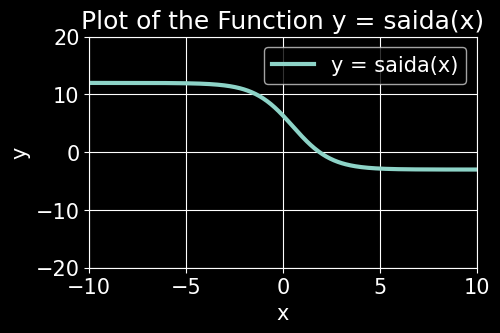

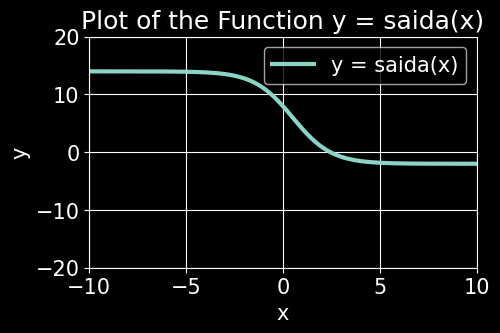

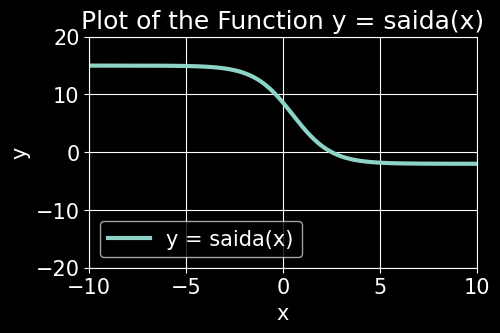

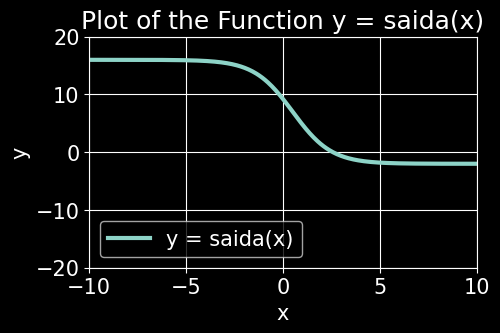

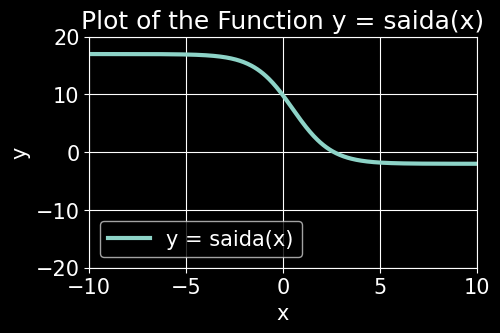

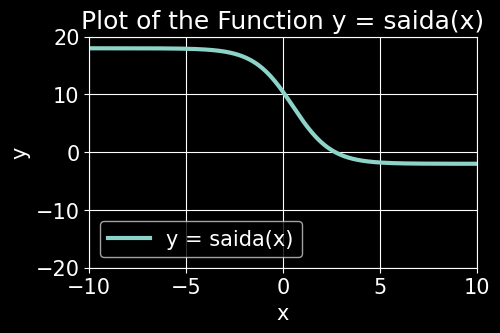

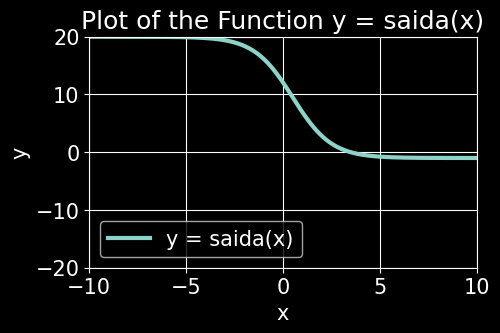

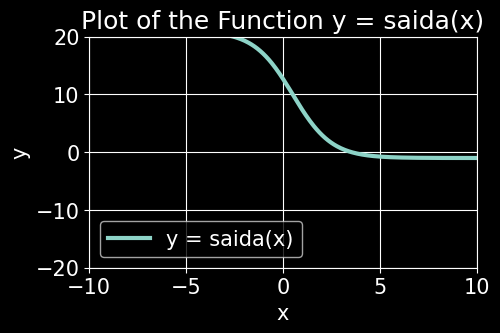

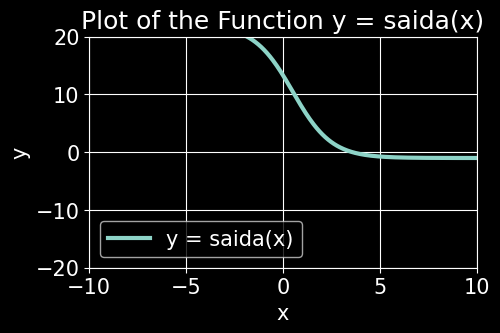

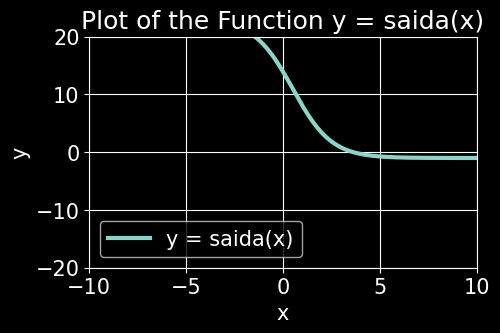

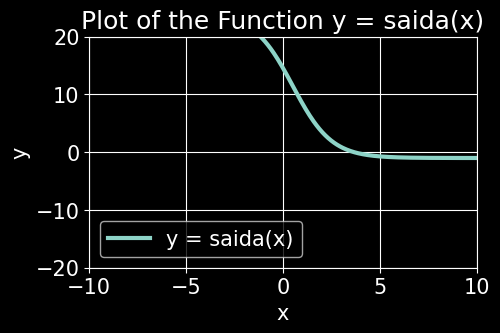

In [375]:
#Camada de saída
beta=-1
alpha=0.5
y1 = beta * x + alpha
y2 = testFunction(n,y1)
gamma=1
delta=-5
i=0
j=0
while i<5:
  j=0
  while j<5:
    saida=gamma*y2+delta
    plt.figure(figsize=(5, 3))  # Set the size of the plot
    plt.xlim([-10, 10])
    plt.ylim([-20, 20])
    plt.plot(x, saida, label='y = saida(x)')  # Plot the function
    plt.xlabel('x')  # Label the x-axis
    plt.ylabel('y')  # Label the y-axis
    plt.title('Plot of the Function y = saida(x)')  # Set the title of the plot
    plt.grid(True)  # Add grid lines
    plt.legend()  # Show legend
    plt.show()  # Display the plot
    gamma=gamma+1
    j=j+1
  delta=delta+1
  i=i+1

Usando o google colab, reproduza e explique os processamentos executados no
vídeo seguinte:
https://www.youtube.com/watch?v=cqDiD2hJTc4

In [376]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy.core.multiarray import ndarray
import pandas as pd
import torch
import torch.nn as nn

In [377]:
colors={'rosa':'#ff66c4','azul':'#5271ff','verde':'#7ED957', 'laranja':'#f6672a'}
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = 15
bbox = dict(boxstyle="round", alpha=0.7, color=colors['rosa'])

In [378]:
def parabola(x: ndarray) -> ndarray:
  ruido = np.random.randn(x.shape[0])/60
  return 2*((x-0.3)**2 -0.45*x+0.3) + ruido

Text(0.5, 1.0, 'Valor do seguro em função da idade (valores normalizados)')

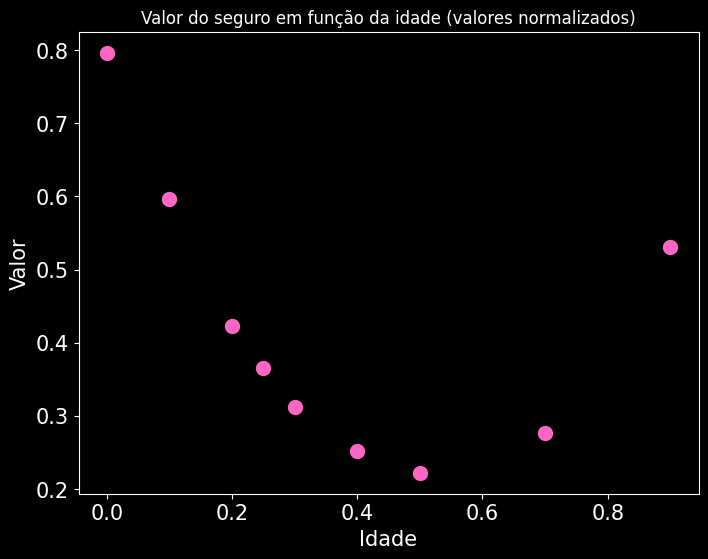

In [379]:
# Cria o dataset de exemplo

idade = np.array([0, 0.1,0.2,0.25,0.3,0.4,0.5,0.7,0.9])
valor = parabola(idade)
plt.scatter(idade,valor, s=100,color = colors['rosa'])
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.title('Valor do seguro em função da idade (valores normalizados)', fontdict={'size':12})

In [380]:
df = pd.DataFrame({'idade':idade, 'valor': valor})
df

,idade,valor
0,0.00,0.796489
1,0.10,0.595783
2,0.20,0.423312
3,0.25,0.365779
4,0.30,0.311648
5,0.40,0.251229
6,0.50,0.222135
7,0.70,0.275813
8,0.90,0.530939


In [381]:
# Prepara os arrays em tensores para o pytorch

x = torch.FloatTensor([df.idade.values.astype(float)])
y = torch.FloatTensor(df.valor.values.astype(float))
x = x.view(x.size(1), -1)
y = y.unsqueeze(1)

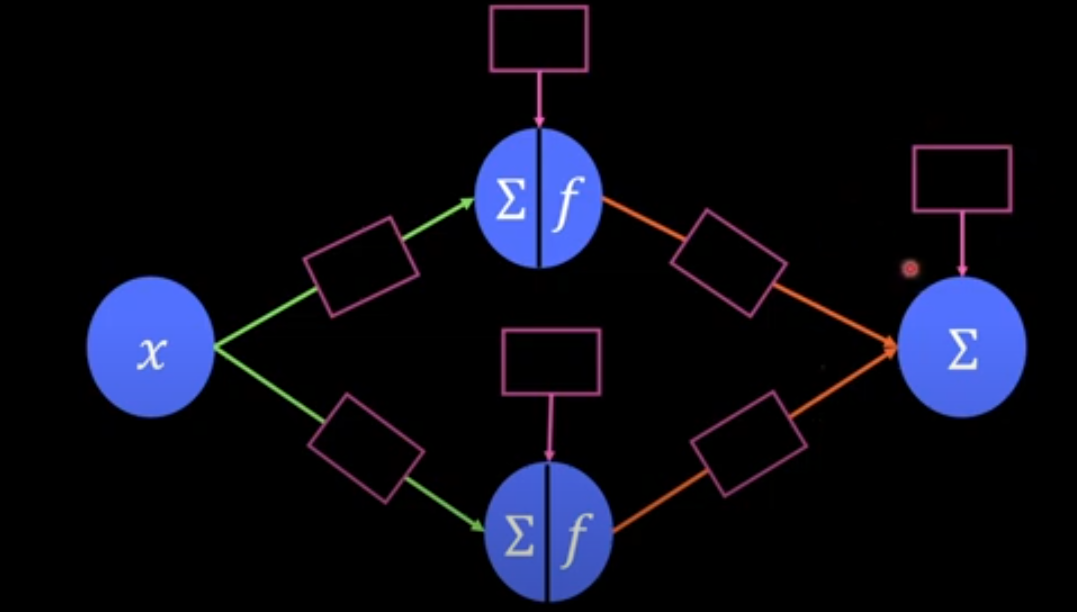

In [382]:
class Model(nn.Module):

  def __init__(self,hidden_neurons=2):
    super().__init__()
    self.hidden_neurons = hidden_neurons
    self.input_layer = nn.Linear(in_features=1, out_features=self.hidden_neurons, bias=True)
    self.output_layer = nn.Linear(in_features=self.hidden_neurons,out_features=1)
    if n==1:
      self.activation = nn.Sigmoid()
    elif n==2:
      self.activation = nn.Tanh()
    else:
      self.activation = nn.ReLU()


  def forward(self,x):
    out = self.input_layer(x)
    out = self.activation(out)
    out = self.output_layer(out)
    return out

In [383]:
EPOCHS = 1000
LR = 0.1

In [384]:
model = Model()
#MSE = Mean Squared Error ---> Boa para problemas de Regressão; Para problemas de classificação, usa-se Cross Entropy Loss -> nn.CrossEntropyLoss()
criterion = nn.MSELoss()

**torch.optim.Adam(...)**: Esta linha configura o otimizador Adam, que é um algoritmo de otimização de taxa de aprendizado adaptativo. O Adam ajusta a taxa de aprendizado para cada peso individualmente, com base na média dos segundos momentos dos gradientes (ou seja, a variância não centrada). Isso o torna efetivo para encontrar o mínimo da função de perda rapidamente.

**params=model.parameters()**: Este argumento especifica os parâmetros (pesos e vieses) do modelo que o otimizador atualizará durante o treinamento. Chamando model.parameters() retorna um iterador sobre os parâmetros do modelo.

**lr=LR**: Isto define a taxa de aprendizado para o otimizador. A taxa de aprendizado controla o tamanho do passo em cada iteração ao se mover em direção a um mínimo da função de perda. Uma taxa de aprendizado menor exige mais épocas para convergir, mas pode levar a uma melhor precisão, enquanto uma taxa de aprendizado maior pode convergir mais rápido, mas pode passar do ponto ótimo da solução.

In [385]:
optimizer = torch.optim.Adam(params=model.parameters(), lr=LR)

In [386]:
# Guarda os valores de pesos e bias para fazer os gráficos

weights = []
bias = []

# Realiza o treinamento

for epoch in range(EPOCHS):

  outputs = model.forward(x)

  loss = criterion(outputs,y)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  weights.append(model.input_layer.weight)
  bias.append(model.input_layer.bias)
out = outputs

In [387]:
print(f'Camada de Entrada:')
print(f'Pesos: {model.input_layer.weight.view(-1).numpy(force=True)}\nBias: {model.input_layer.bias.numpy(force=True)}')

Camada de Entrada:
Pesos: [-7.072866  -2.4340525]
Bias: [1.0339268 1.5980328]


In [388]:
print(f'Camada escondida:')
print(f'Pesos: {model.output_layer.weight.view(-1).numpy(force=True)}\nBias: {model.output_layer.bias.numpy(force=True)}')

Camada escondida:
Pesos: [ 1.401738  -1.5592532]
Bias: [1.0428561]


In [389]:
def tensor_to_numpy(tensor: torch.tensor):
  """
  Convert os tensores em numpy para fazer os gráficos
  """
  return tensor.view(-1).numpy(force=True)

In [390]:
x_range = torch.FloatTensor(np.arange(0,1.0,0.02))

In [391]:
def testFunction_torch(n,y):
  if n==1:
    return 1 / (1 + torch.exp(-y))
  elif n==2:
    return torch.tanh(y)
  else:
    return torch.clamp(y,min=0)

**Primeiro Neurônio**

In [392]:
# Tensores
# x_range é criado para obter mais pontos e um gráfico suave
x_range = torch.arange(x.min(), x.max(), 0.01)
y1 = x_range*model.input_layer.weight[0][0] + model.input_layer.bias[0]
sigmoid1 = testFunction_torch(n,y1)
saida1 = sigmoid1*model.output_layer.weight[0][0]

In [393]:
# Numpy arrays
y1_numpy = tensor_to_numpy(y1)
sigmoid1_numpy = tensor_to_numpy(sigmoid1)
saida1_numpy = tensor_to_numpy(saida1)

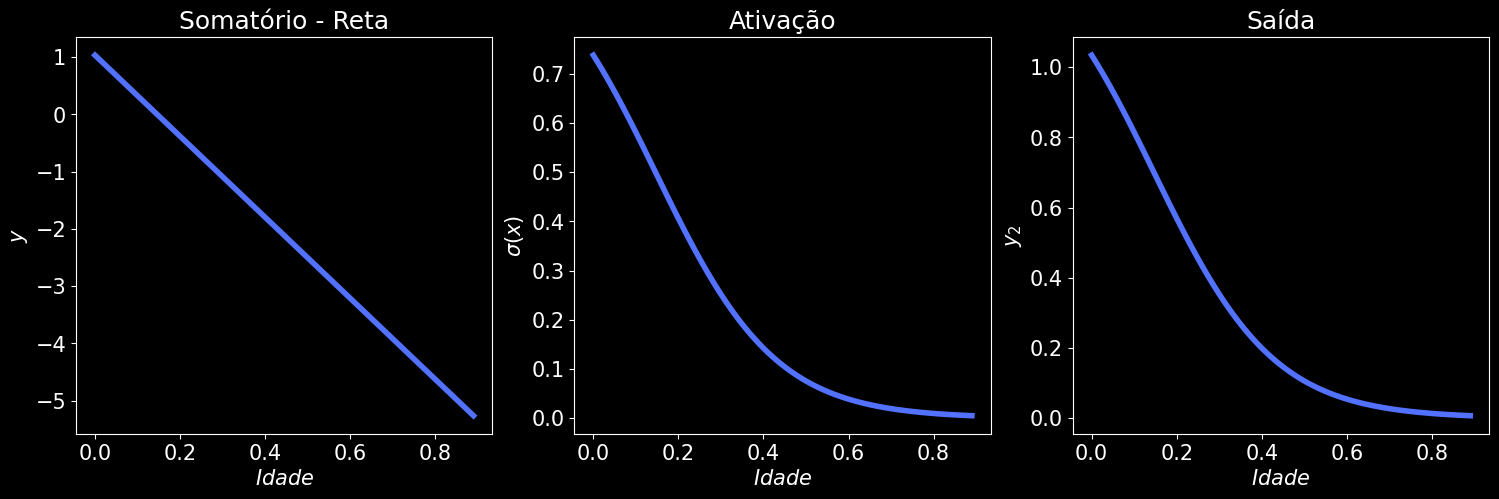

In [394]:
fig, ax = plt.subplots(nrows= 1, ncols = 3, figsize=(15,5))

# Somatório - Perceptron
ax[0].plot(x_range, y1_numpy, lw=4, color=colors['azul'])
ax[0].set_xlabel(r'$Idade$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Somatório - Reta')

# Ativação - Sigmoid
ax[1].plot(x_range, sigmoid1_numpy, lw=4, color=colors['azul'])
ax[1].set_xlabel(r'$Idade$')
ax[1].set_ylabel(r'$\sigma(x)$')
ax[1].set_title('Ativação')

# Após peso w2 - Entrada para o neuronio de saída
ax[2].plot(x_range, saida1_numpy, lw=4, color=colors['azul'])
ax[2].set_xlabel(r'$Idade$')
ax[2].set_ylabel(r'$y_2$')
ax[2].set_title('Saída')

plt.tight_layout(pad=0.5)

**Segundo Neurônio**

In [395]:
y2 = x_range*model.input_layer.weight[1][0] + model.input_layer.bias[1]
sigmoid2 = testFunction_torch(n,y2)
saida2 = sigmoid2*model.output_layer.weight[0][1]

In [396]:
y2_numpy = tensor_to_numpy(y2)
sigmoid2_numpy = tensor_to_numpy(sigmoid2)
saida2_numpy = tensor_to_numpy(saida2)

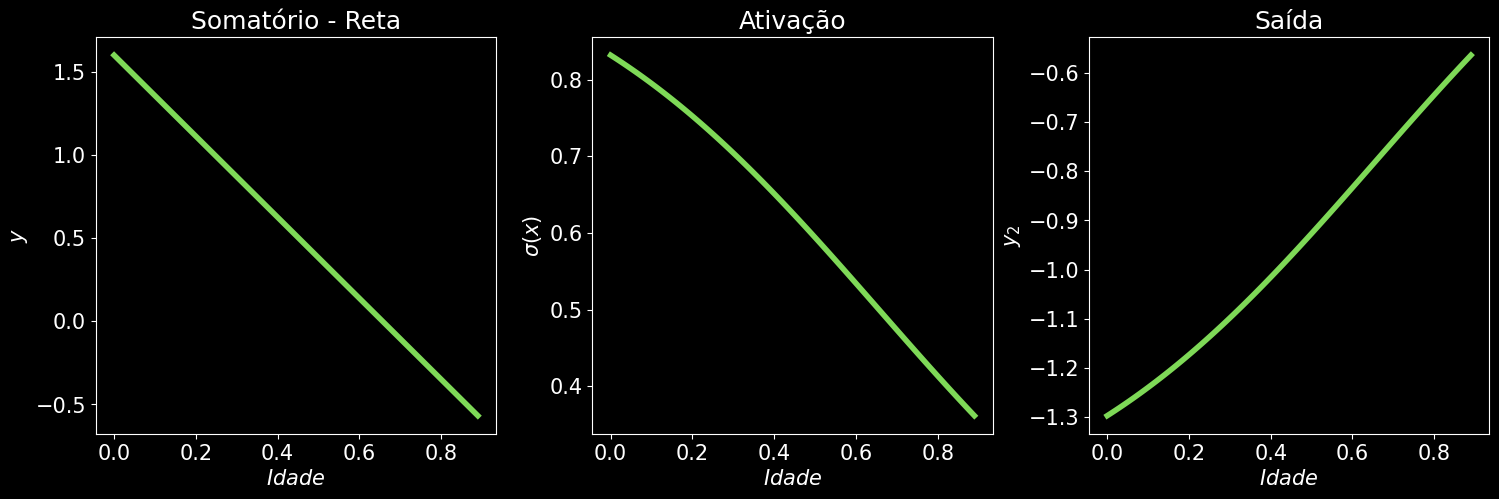

In [397]:
fig, ax = plt.subplots(nrows= 1, ncols = 3, figsize=(15,5))

# Somatório - Perceptron
ax[0].plot(x_range, y2_numpy, lw=4, color=colors['verde'])
ax[0].set_xlabel(r'$Idade$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Somatório - Reta')

# Ativação - Sigmoid
ax[1].plot(x_range, sigmoid2_numpy, lw=4, color=colors['verde'])
ax[1].set_xlabel(r'$Idade$')
ax[1].set_ylabel(r'$\sigma(x)$')
ax[1].set_title('Ativação')

# Após peso w2 - Entrada para o neuronio de saída
ax[2].plot(x_range, saida2_numpy, lw=4, color=colors['verde'])
ax[2].set_xlabel(r'$Idade$')
ax[2].set_ylabel(r'$y_2$')
ax[2].set_title('Saída')

plt.tight_layout(pad=0.5)

**Saída**

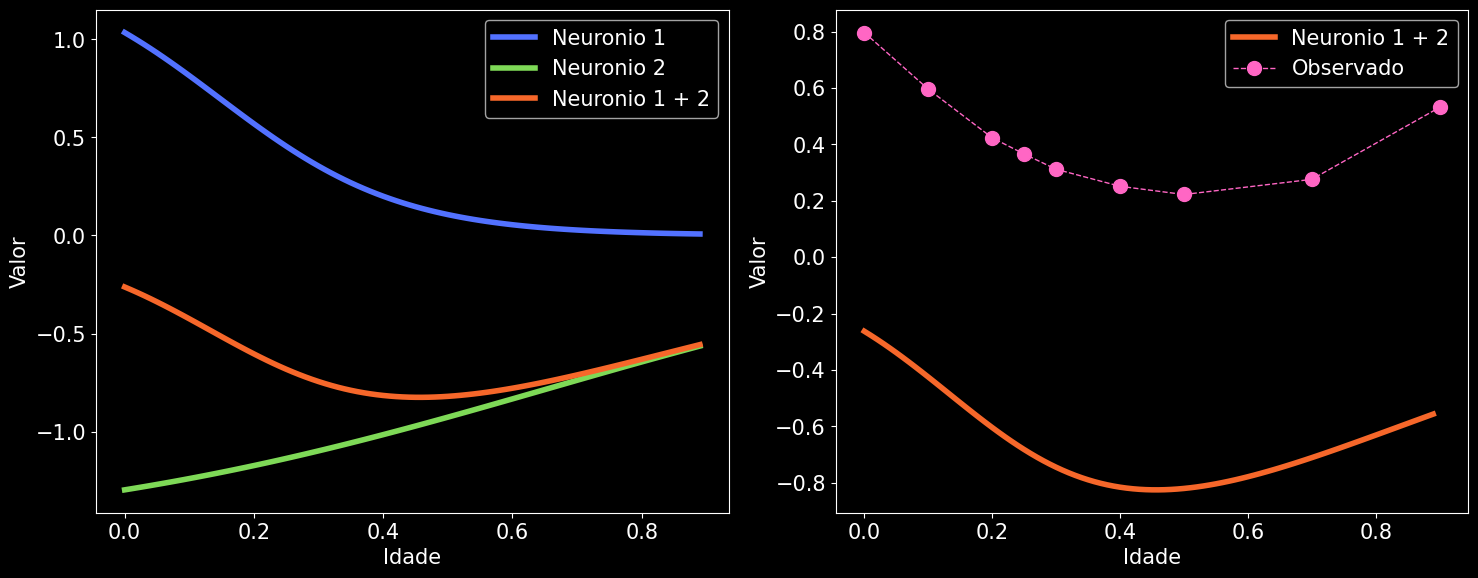

In [398]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

ax[0].plot(x_range, saida1_numpy, lw=4, color=colors['azul'], label = 'Neuronio 1')
ax[0].plot(x_range, saida2_numpy,lw=4, color=colors['verde'], label = 'Neuronio 2')
ax[0].plot(x_range, saida1_numpy + saida2_numpy, lw=4, color=colors['laranja'], label = 'Neuronio 1 + 2')
ax[0].set_xlabel('Idade')
ax[0].set_ylabel('Valor')
ax[0].legend()

ax[1].plot(x_range, saida1_numpy + saida2_numpy, lw=4, color=colors['laranja'], label = 'Neuronio 1 + 2')
ax[1].plot(x, y, linestyle = 'dashed', color=colors['rosa'], lw=1, marker='o', markerfacecolor=colors['rosa'], markersize=10, label = 'Observado')
ax[1].set_xlabel('Idade')
ax[1].set_ylabel('Valor')
ax[1].legend()

plt.tight_layout(pad=1)

In [399]:
saida = saida1 + saida2  + model.output_layer.bias[0]
saida_numpy = tensor_to_numpy(saida)

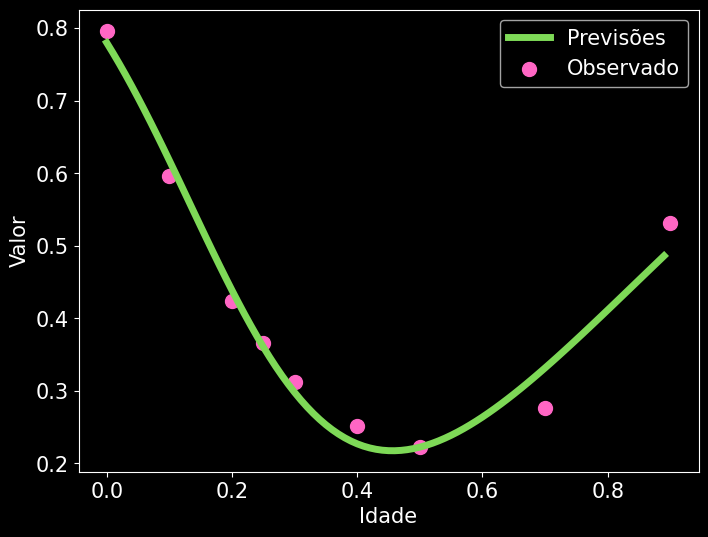

In [400]:
plt.plot(x_range, saida_numpy, color=colors['verde'], lw=5, label = 'Previsões')
plt.scatter(x, y, color=colors['rosa'], marker='o', s=100, label = 'Observado')
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.legend()

In [401]:
model.forward(torch.FloatTensor([0.15]))

tensor([0.5269], grad_fn=<ViewBackward0>)